# About Dataset:
dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.
- We have to  make a Model that can predict the profit based on the comapanies data.

## Multiple Linear Regression

### 1.1 importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Load dataset

In [2]:

dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### 2 EDA

#### 2.1 identifying  the missing values

In [3]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

- There is no null values

#### 2.2 checking the datatype

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


- Here __state__ column is object type. later we will convert this column  into dummy varible.

#### 2.3 Descriptive Analysis

In [5]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### 2.4  Checking the distribution of  'R&D Spend',    'Administration'   &  'Marketing Spend'

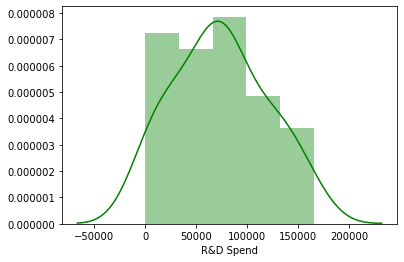

In [6]:
sns.distplot(dataset['R&D Spend'], color = 'green')

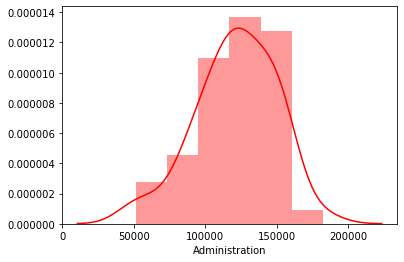

In [7]:
sns.distplot(dataset['Administration'], color = 'red')

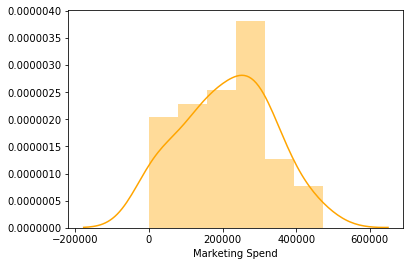

In [8]:
sns.distplot(dataset['Marketing Spend'], color = 'orange')

####  2.5 Checking the relation b/w the features and o/p variable

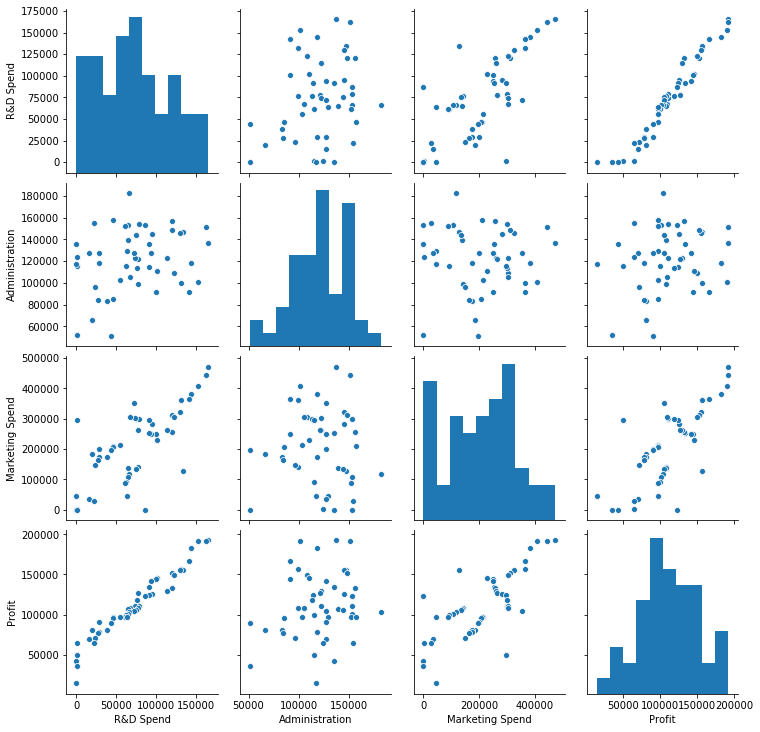

In [9]:
sns.pairplot(dataset)

- Here above we can see that R&D Spend have linear relationship with Profit.
- So here it's most significant feature compare to others.

#### 2.6 find the correlation

In [10]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


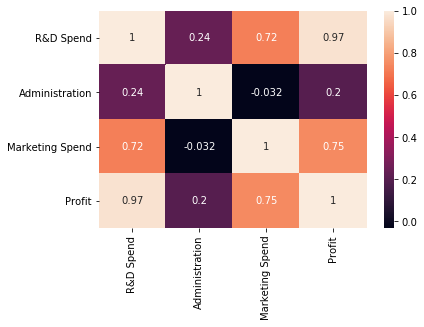

In [11]:
sns.heatmap(dataset.corr(), annot = True)

- Here above we can see that __R&D Spend__ is highly correlated to __Profit__.

### 3. Data Preparing

#### 3.1 splitting  data into dependent &  independent varibles 

In [12]:

X = dataset.iloc[:,:-1].values

y = dataset.iloc[:,4].values

print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [13]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


#### 3.2 Encoding categorical data :

 To encode the categorical variable into numbers, we will use the LabelEncoder class. But it is not sufficient because it still has some relational order, which may create a wrong model. So in order to remove this problem, we will use OneHotEncoder, which will create the dummy variables. Below is code for it:


In [14]:

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])

# Country column
ct = ColumnTransformer([("Country", OneHotEncoder(), [3])], remainder = 'passthrough')
                                # creating dummy var(for states means 3 diff. column ) 
X = ct.fit_transform(X)
print(X)



[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

####  3.3  Avoiding the dummy variable trap:

If we do not remove the first dummy variable, then it may introduce multicollinearity in the model.

In [15]:

X = X[:,1:]
print(X)

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 77044.01 99281.34 140574.81]
 [0

#### 3.4 Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

### 4 Modeling

#### 4.1 Training the Multiple Linear Regression model on the Training set

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()


### 5. Making the predictions and evaluating the model

#### 5.1 Predicting the Test set results

In [18]:
y_pred = regressor.predict(X_test)

#### 5.2 comparing the actual_price with predicted_price

In [19]:

for i,j in np.nditer((y_test, y_pred)):
    print(i,"      ", j)  # compare actual price vs predicted price
    

103282.38        111616.6425945182
144259.4        132709.3946631519
146121.95        140155.1103379226
77798.83        76099.20398183946
191050.39        186329.9424037041
105008.31        112822.19807254503
81229.06        63002.003948046
97483.56        99107.10428091743
110352.25        119287.75473382448
166187.94        175522.83864737797
96778.92        101000.69861500282
96479.51        85772.9929323513
105733.54        117713.76481525625
96712.8        90230.88085201534
124266.9        133375.043894512
155752.6        167530.5476582771
132602.65        158013.5460206209


#### 5.3 evaluate the train & test score performance

In [20]:
print(regressor.score(X_train, y_train))
print(regressor.score(X_test,y_test))



0.9576035764205424
0.8752655285748678


### 6. find optimal Model using backward elimination

#### Backward elimination:
Backward elimination is a feature selection technique while building a machine learning model. It is used to remove those features that do not have a significant effect on the dependent variable or prediction of output.


Unnecessary features increase the complexity of the model. Hence it is good to have only the most significant features and keep our model simple to get the better result.

In [21]:

import statsmodels.api as sm
# (bydefault it's not take constant(thetas 0 ,we have to put theta_0 * X0 = 1
# that's why we are creating col. of 1's and trying to put in the starting of X)
X = np.append(arr  = np.ones((50,1)).astype(int),values = X, axis = 1)# we are adding 1 extra col. in the starting  of X
print(X)


# np.append(values = X, np.ones((50,1)), axis = 1) # it will add col. at the last of X dataset

[[1 0.0 1.0 165349.2 136897.8 471784.1]
 [1 0.0 0.0 162597.7 151377.59 443898.53]
 [1 1.0 0.0 153441.51 101145.55 407934.54]
 [1 0.0 1.0 144372.41 118671.85 383199.62]
 [1 1.0 0.0 142107.34 91391.77 366168.42]
 [1 0.0 1.0 131876.9 99814.71 362861.36]
 [1 0.0 0.0 134615.46 147198.87 127716.82]
 [1 1.0 0.0 130298.13 145530.06 323876.68]
 [1 0.0 1.0 120542.52 148718.95 311613.29]
 [1 0.0 0.0 123334.88 108679.17 304981.62]
 [1 1.0 0.0 101913.08 110594.11 229160.95]
 [1 0.0 0.0 100671.96 91790.61 249744.55]
 [1 1.0 0.0 93863.75 127320.38 249839.44]
 [1 0.0 0.0 91992.39 135495.07 252664.93]
 [1 1.0 0.0 119943.24 156547.42 256512.92]
 [1 0.0 1.0 114523.61 122616.84 261776.23]
 [1 0.0 0.0 78013.11 121597.55 264346.06]
 [1 0.0 1.0 94657.16 145077.58 282574.31]
 [1 1.0 0.0 91749.16 114175.79 294919.57]
 [1 0.0 1.0 86419.7 153514.11 0.0]
 [1 0.0 0.0 76253.86 113867.3 298664.47]
 [1 0.0 1.0 78389.47 153773.43 299737.29]
 [1 1.0 0.0 73994.56 122782.75 303319.26]
 [1 1.0 0.0 67532.53 105751.03 30476

#### 6.1 applying backward elimination

In [22]:
X_opt =X[:, [0,1,2,3,4,5]].astype(float)
regressor_OLS = sm.OLS(y,X_opt).fit()  
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           1.34e-27
Time:                        16:11:34   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:

X_opt =X[:, [0,1,3,4,5]].astype(float)   # removed X2(dummmy var) cause p>SL(significant level =0.5)
regressor_OLS = sm.OLS(y,X_opt).fit()           #    p>SL (0.990 > 0.05)
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           8.49e-29
Time:                        16:11:34   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X_opt =X[:, [0,3,4,5]].astype(float)   # removed X1(dummy var) cause P>SL(0.953 > 0.05)
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           4.53e-30
Time:                        16:11:34   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X_opt =X[:, [0,3,5]].astype(float)   #     removed X4(administration) cause P>SL (0.608 > 0.05)
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           2.16e-31
Time:                        16:11:34   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X_opt =X[:, [0,3]].astype(float)   # removed X5 (marketing spend) cause P>SL(0.060 > 0.05)
regressor_OLS = sm.OLS(y,X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           3.50e-32
Time:                        16:11:34   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 7. Apply  optimal Multiple Linear Regression model

####  7.1 Extracting Independent and dependent Variable

In [27]:
  
x_BE= dataset.iloc[:,[0]].values  
y_BE= dataset.iloc[:, -1].values  
  

#### 7.2 Splitting the dataset into training and test set

In [28]:
 
from sklearn.model_selection import train_test_split  
x_BE_train, x_BE_test, y_BE_train, y_BE_test= train_test_split(x_BE, y_BE, test_size= 0.20, random_state=0)  
  

####  7.3 Fitting the MLR model to the training set

In [29]:
  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(np.array(x_BE_train).reshape(-1,1), y_BE_train)  

LinearRegression()

####  7.4 Predicting the Test set result

In [30]:

y_pred= regressor.predict(x_BE_test)  


####  7.5 Cheking the score

In [31]:
    
print('Train Score: ', regressor.score(x_BE_train, y_BE_train))  
print('Test Score: ', regressor.score(x_BE_test, y_BE_test))  

Train Score:  0.9449589778363044
Test Score:  0.9464587607787219


#### 7.6 Comparision b/w actual price and predicted price 

In [32]:
for i,j in np.nditer((y_BE_test,y_pred)):
    print(i,"      ", j)
    

103282.38        104667.27805997859
144259.4        134150.8341057847
146121.95        135207.80019516923
77798.83        72170.54428855634
191050.39        179090.58602508352
105008.31        109824.77386586336
81229.06        65644.27773756774
97483.56        100481.43277138655
110352.25        111431.75202432103
166187.94        169438.148435391


### 8. Visualizing the final result 

####  8.1 Visualizing the R&d spend with Profits

R&D independent variable is a significant variable for the prediction. So we  predicted efficiently using this variable.
We can see below the relation of R&d spend with Profits.

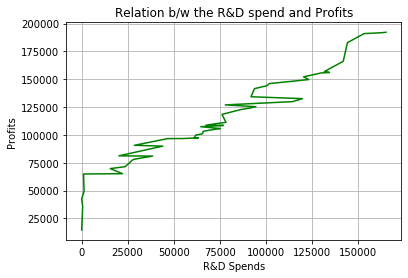

In [33]:
plt.plot(dataset.iloc[:,0], dataset.iloc[:, 4], color = 'green')
plt.xlabel('R&D Spends')
plt.ylabel('Profits')
plt.title('Relation b/w the R&D spend and Profits')
plt.grid()

#### 8.2 Visualizing the train set result 

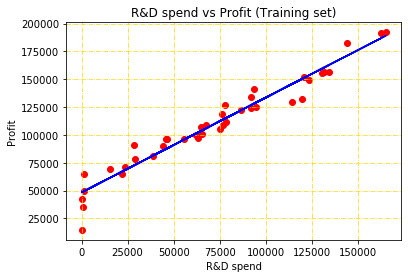

In [34]:
plt.scatter(x_BE_train, y_BE_train, color = 'red')
plt.plot(x_BE_train, regressor.predict(x_BE_train), color = 'blue')
plt.title('R&D spend vs Profit (Training set)')
plt.xlabel('R&D spend')
plt.ylabel('Profit')
plt.grid(color='gold', linestyle='-.', linewidth=0.7)
plt.show()


####  8.3 Visualizing the test set result 

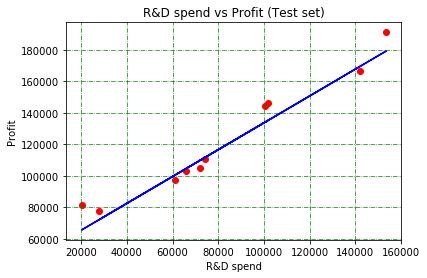

In [35]:
plt.scatter(x_BE_test, y_BE_test, color = 'red')
plt.plot(x_BE_test, regressor.predict(x_BE_test), color = 'blue')
plt.title('R&D spend vs Profit (Test set)')
plt.xlabel('R&D spend')
plt.ylabel('Profit')
plt.grid(color = 'green', linestyle='-.', linewidth=0.7)
plt.show()

### 9. Conclusion :


We got this result by using one independent variable (R&D spend) only instead of four variables. Hence, now our model is simple and accurate.